In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
DU145 = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data_DU145.tsv", sep='\t', index_col=0)
DU145.head()

,og_df_idx,sample,cell_line,response,ID,CYP51A1,MGST1,VDAC3,STRAP,PSMA4,...,LAPTM4B,TMX1,ADAM9,EIF1,NCEH1,NEAT1,SNHG1,B2M,OAZ1,PSMB3
0,1,GSM4161578,DU145,Res,55,1.095660,0.962989,-0.390678,-0.020920,0.542339,...,0.445006,0.167306,0.436825,0.657008,0.465230,0.749750,-0.346104,0.949318,0.188539,0.288163
1,3,GSM4161499,DU145,Sen,48,-1.367556,-1.892345,-3.802103,-1.391733,-2.446313,...,-2.624757,-1.986447,-3.263612,-1.208059,-1.360966,-2.241855,0.431866,-0.979595,-2.047853,-2.927521
2,5,GSM4161557,DU145,Res,34,1.026333,0.476668,0.146564,-0.010736,0.473771,...,0.028082,0.607048,0.557547,0.249777,-0.030007,-0.160165,-3.308772,0.388580,0.718945,0.431462
3,6,GSM4161538,DU145,Res,15,0.928410,0.566203,0.109865,0.075118,0.471016,...,0.127551,-0.229411,0.458631,0.183447,0.086968,-0.330964,-0.207033,0.531295,-0.057859,0.220060
4,9,GSM4161457,DU145,Sen,6,-1.922705,-1.395724,-1.178172,-0.656984,-1.180434,...,-1.243050,-1.259246,-1.685750,-1.623156,-0.972156,-1.164160,-0.983181,-2.002477,-2.040096,-1.258305


In [4]:
DU145_cluster = DU145.drop(['sample', 'cell_line',  'ID', 'og_df_idx'], axis = 1)
DU145_cluster = DU145_cluster.set_index('response')
DU145_cluster.head()

,CYP51A1,MGST1,VDAC3,STRAP,PSMA4,TRIP13,SLC25A3,GADD45B,LGALS1,RPL3,...,LAPTM4B,TMX1,ADAM9,EIF1,NCEH1,NEAT1,SNHG1,B2M,OAZ1,PSMB3
response,,,,,,,,,,,,,,,,,,,,,
Res,1.095660,0.962989,-0.390678,-0.020920,0.542339,-0.715000,0.574151,0.211113,0.365888,0.579046,...,0.445006,0.167306,0.436825,0.657008,0.465230,0.749750,-0.346104,0.949318,0.188539,0.288163
Sen,-1.367556,-1.892345,-3.802103,-1.391733,-2.446313,-3.072534,-2.083870,-1.158659,-0.648259,-1.643544,...,-2.624757,-1.986447,-3.263612,-1.208059,-1.360966,-2.241855,0.431866,-0.979595,-2.047853,-2.927521
Res,1.026333,0.476668,0.146564,-0.010736,0.473771,0.189067,0.340793,0.143843,0.021019,0.568480,...,0.028082,0.607048,0.557547,0.249777,-0.030007,-0.160165,-3.308772,0.388580,0.718945,0.431462
Res,0.928410,0.566203,0.109865,0.075118,0.471016,-0.900127,0.178655,-0.357254,0.807726,0.493234,...,0.127551,-0.229411,0.458631,0.183447,0.086968,-0.330964,-0.207033,0.531295,-0.057859,0.220060
Sen,-1.922705,-1.395724,-1.178172,-0.656984,-1.180434,-0.586705,-1.821023,-1.504895,-0.552873,-1.738477,...,-1.243050,-1.259246,-1.685750,-1.623156,-0.972156,-1.164160,-0.983181,-2.002477,-2.040096,-1.258305


In [5]:
# renamed_columns = [i[(i.index('|')+1):] for i in list(DU145_cluster.columns)]
# DU145_cluster.columns = renamed_columns

In [6]:
PC3 = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data_PC3.tsv", sep='\t', index_col=0)
PC3.head()

,og_df_idx,sample,cell_line,response,ID,CD9,SYPL1,NME1,PSMA4,ASNS,...,HSBP1,MSMP,AC010970.2,TMX1,EIF1,NEAT1,CXCL2,MTATP6P1,MAL2,B2M
0,0,GSM4161769,PC3,Res,84,-0.517198,-0.632057,-1.189322,-0.647247,-1.472626,...,0.461659,-1.179807,0.907275,-0.622409,0.512588,1.659146,-0.462996,0.883241,0.042648,0.888186
1,2,GSM4161715,PC3,Res,30,0.855890,0.796209,-0.246952,0.683444,1.172218,...,0.801054,0.910677,0.015436,0.700068,1.099030,0.430106,0.010919,1.010342,0.570048,0.790960
2,4,GSM4161745,PC3,Res,60,1.232866,0.523105,0.267647,-0.082364,-1.311988,...,1.321535,0.834046,-0.269744,0.238691,0.897919,0.096618,-0.462996,0.030137,1.124056,1.532183
3,7,GSM4161616,PC3,Sen,21,-1.602350,-3.108739,1.229018,0.841351,-1.747239,...,-0.970160,-0.221637,1.559325,-1.981431,0.278917,0.970147,-0.462996,1.675328,0.470497,-0.775891
4,8,GSM4161684,PC3,Sen,89,-3.162352,0.178384,0.875522,0.379513,-1.747239,...,-0.113371,0.042360,1.375198,-0.473401,0.819504,0.344814,-0.462996,0.132832,-0.400630,0.254669


In [7]:
PC3_cluster = PC3.drop(['sample', 'cell_line',  'ID', 'og_df_idx'], axis = 1)
PC3_cluster = PC3_cluster.set_index('response')
PC3_cluster.head()

,CD9,SYPL1,NME1,PSMA4,ASNS,SLC25A3,ACTN1,RPS5,TMEM230,SERPIND1,...,HSBP1,MSMP,AC010970.2,TMX1,EIF1,NEAT1,CXCL2,MTATP6P1,MAL2,B2M
response,,,,,,,,,,,,,,,,,,,,,
Res,-0.517198,-0.632057,-1.189322,-0.647247,-1.472626,0.501715,-2.641011,0.194652,0.659270,0.439286,...,0.461659,-1.179807,0.907275,-0.622409,0.512588,1.659146,-0.462996,0.883241,0.042648,0.888186
Res,0.855890,0.796209,-0.246952,0.683444,1.172218,0.582238,0.190970,0.126495,0.862430,0.936234,...,0.801054,0.910677,0.015436,0.700068,1.099030,0.430106,0.010919,1.010342,0.570048,0.790960
Res,1.232866,0.523105,0.267647,-0.082364,-1.311988,0.563408,0.310985,0.951028,0.854627,0.848532,...,1.321535,0.834046,-0.269744,0.238691,0.897919,0.096618,-0.462996,0.030137,1.124056,1.532183
Sen,-1.602350,-3.108739,1.229018,0.841351,-1.747239,0.203698,0.178839,-0.296877,-0.443366,0.736881,...,-0.970160,-0.221637,1.559325,-1.981431,0.278917,0.970147,-0.462996,1.675328,0.470497,-0.775891
Sen,-3.162352,0.178384,0.875522,0.379513,-1.747239,0.031320,0.367816,1.111318,-0.534107,-1.259345,...,-0.113371,0.042360,1.375198,-0.473401,0.819504,0.344814,-0.462996,0.132832,-0.400630,0.254669


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


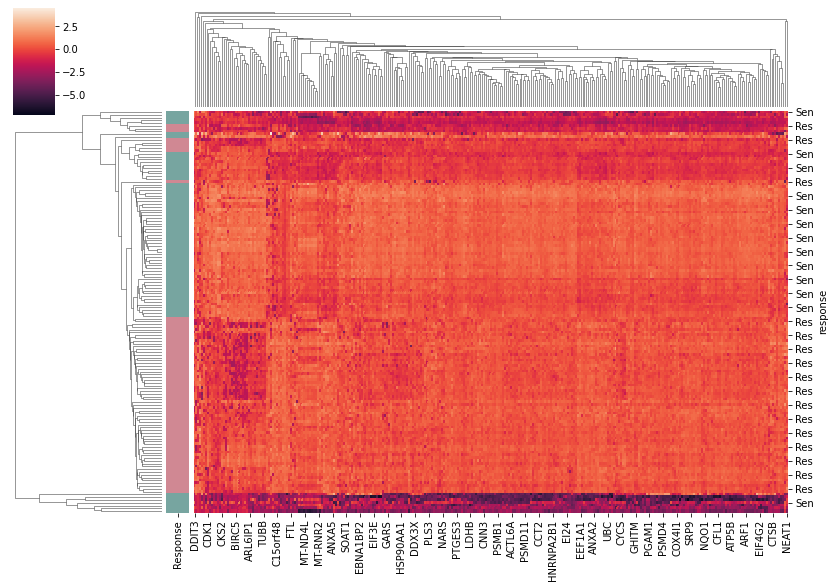

In [88]:
import numpy as np
response_code = DU145.loc[:,"response"].tolist()
color_dict = dict(zip(np.unique(response_code),sns.husl_palette(len(np.unique(response_code)),s=0.45)))
rcolors = pd.Series(response_code,index=DU145_cluster.index.values,name="Response").map(color_dict)
sns.clustermap(data=DU145_cluster, row_colors=rcolors, figsize = (11.7, 8.27))
plt.title("Hierarchical Clustering for DU145 Cell Line")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


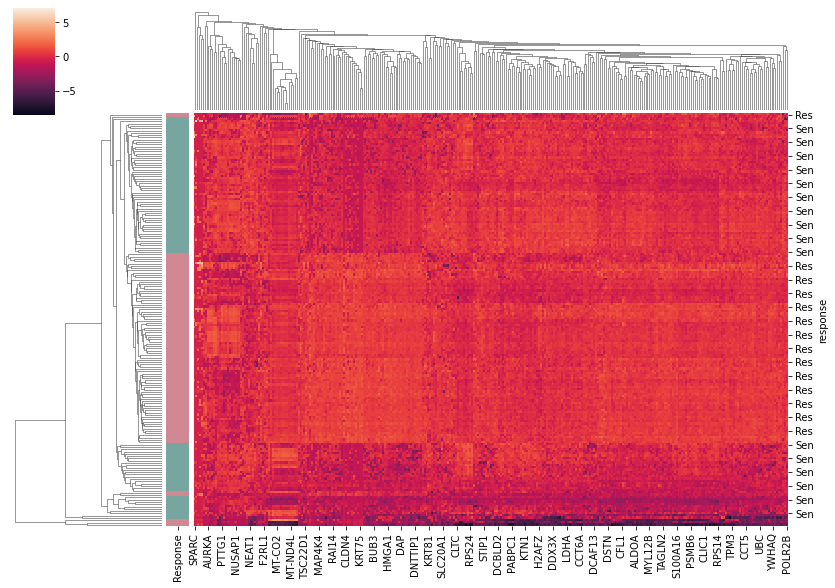

In [87]:
#PC_response_code = PC3['response'].map(dict(zip(list(set(PC3['response'])), range(0,1))))
pc_response_code = PC3.loc[:,"response"].tolist()
pc_color_dict = dict(zip(np.unique(response_code),sns.husl_palette(len(np.unique(response_code)),s=0.45)))
pc_rcolors = pd.Series(pc_response_code,index=PC3_cluster.index.values,name="Response").map(pc_color_dict)

graph = sns.clustermap(PC3_cluster, row_colors=pc_rcolors, figsize = (11.7, 8.27))
ax = graph.ax_heatmap
ax.set_xlabel("Genes")
ax.set_ylabel("Response")
plt.title("Hierarchical Clustering for PC3 Cell Line")
plt.show()

# Gene Expression Analysis 

In [10]:
# read in genes selected by Marie
selected_genes = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/Marie_selectedgenes.txt", header=None)
selected_genes = selected_genes.values

In [11]:
#define helper functions used for expression analysis 
def calculate_spearman(expression_df):
  corr, p_value = stats.spearmanr(expression_df, axis=0)
  corr = pd.DataFrame(corr, columns = list(expression_df.columns), index = list(expression_df.columns))
  p_value = pd.DataFrame(p_value, columns = list(expression_df.columns), index = list(expression_df.columns))

  significantly_correlated = {}
  for column in expression_df.columns:
    significantly_correlated[column] = [list(corr[column].index)[list(corr[column]).index(c)] for c, p in zip(list(corr[column]), list(p_value[column])) if (c > 0.5 and c != 1.0 and p < 0.05) and (list(corr[column].index)[list(corr[column]).index(c)] != column)]

  return corr, p_value, significantly_correlated

def plot_matrix(matrix, title):
  plt.figure(figsize=(11.7, 8.27))
  sns.heatmap(matrix, annot=True)
  plt.title(title)
  plt.show()

def select_rows(df, selected_genes, response):
  df = df[df['response'] == response]
  df.index = df['ID']
  df = df.drop(['ID'], axis = 1)
  df = df[[c for c in df.columns if c in selected_genes]]
  return df

def calculate_wilcoxon(expression_df):
  significantly_different = {}
  p_value_matrix = []
  for column in expression_df.columns:
    index = list(expression_df.columns).index(column)
    p_value_temp = []
    for other in list(expression_df.columns):
      w, p = stats.ranksums(expression_df[column], expression_df[other])
      p_value_temp.append(p)
      if p < 0.05:
        if column in significantly_different.keys():
          significantly_different[column].append(other)
        else:
          significantly_different[column] = [other]
    p_value_matrix.append(p_value_temp)
  return p_value_matrix, significantly_different

## DU145 Cell Line Analysis

In [12]:
DU145_average = DU145.drop(['sample', 'cell_line', 'og_df_idx'], axis = 1)

In [80]:
# select for resistance and sensitive genes and separate them into different dataframe
DU145_res = select_rows(DU145_average, selected_genes, 'Res')
DU145_sen = select_rows(DU145_average, selected_genes, 'Sen')

### Spearman Analysis

In [14]:
corr_res, p_res, sig_corr_res = calculate_spearman(DU145_res)
corr_sen, p_sen, sig_corr_sen = calculate_spearman(DU145_sen)

In [15]:
print("Significantly Correlated Resistant Genes for DU145")
sig_corr_res

Significantly Correlated Resistant Genes for DU145


{'CENPF': ['KPNA2', 'TOP2A'],
 'DKK1': [],
 'GARS': [],
 'HIF1A': [],
 'HIST1H4C': ['TOP2A'],
 'HSPA5': [],
 'KPNA2': ['CENPF', 'TOP2A'],
 'KRT18': [],
 'NEAT1': [],
 'TFRC': [],
 'TOP2A': ['KPNA2', 'CENPF', 'HIST1H4C']}

In [16]:
print("Significantly Correlated Sensitive Genes for DU145")
sig_corr_sen

Significantly Correlated Sensitive Genes for DU145


{'CENPF': ['KPNA2', 'GARS', 'TOP2A'],
 'DKK1': ['HIF1A', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS', 'TOP2A'],
 'GARS': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'TOP2A'],
 'HIF1A': ['HSPA5', 'KPNA2', 'TFRC', 'DKK1', 'KRT18', 'GARS', 'TOP2A'],
 'HIST1H4C': ['KPNA2', 'DKK1', 'GARS', 'TOP2A'],
 'HSPA5': ['HIF1A', 'KPNA2', 'TFRC', 'GARS', 'TOP2A', 'NEAT1'],
 'KPNA2': ['HIF1A',
  'HSPA5',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A'],
 'KRT18': ['HIF1A', 'KPNA2', 'TFRC', 'DKK1', 'GARS', 'TOP2A'],
 'NEAT1': ['HSPA5'],
 'TFRC': ['HIF1A', 'HSPA5', 'KPNA2', 'DKK1', 'KRT18', 'GARS', 'TOP2A'],
 'TOP2A': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'GARS']}

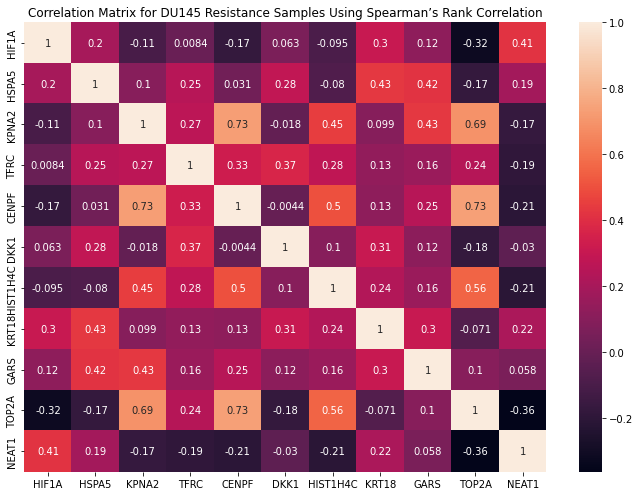

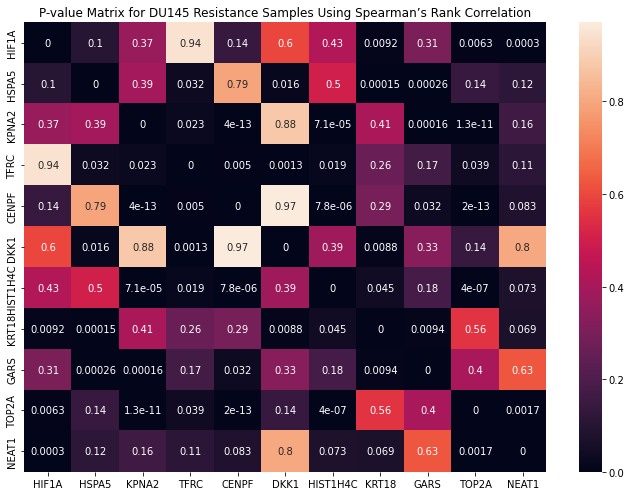

In [97]:
plot_matrix(corr_res, 'Correlation Matrix for DU145 Resistance Samples Using Spearman’s Rank Correlation')
plot_matrix(p_res, 'P-value Matrix for DU145 Resistance Samples Using Spearman’s Rank Correlation')

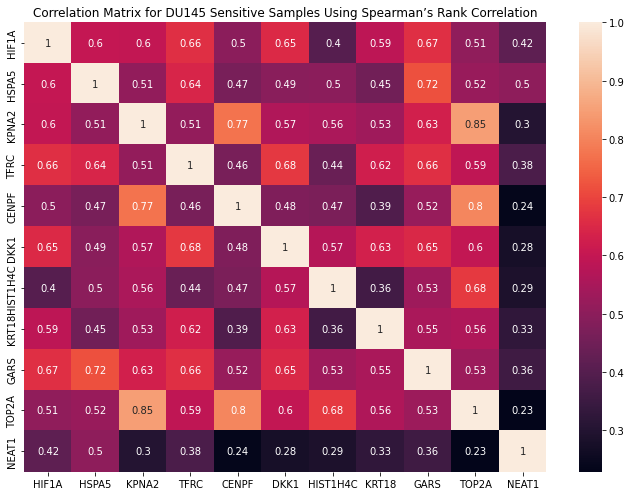

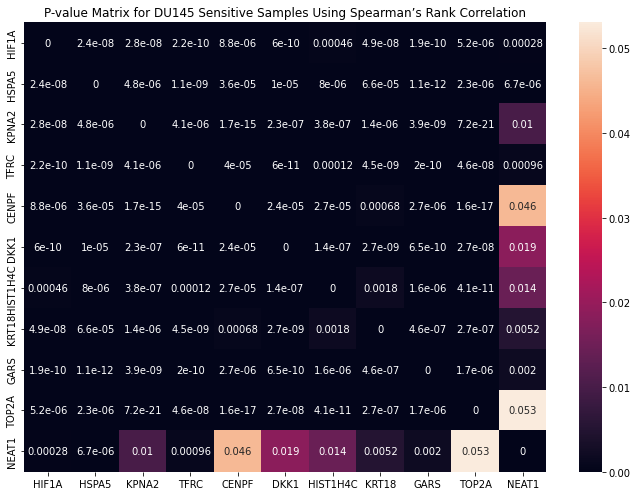

In [96]:
plot_matrix(corr_sen, 'Correlation Matrix for DU145 Sensitive Samples Using Spearman’s Rank Correlation')
plot_matrix(p_sen, 'P-value Matrix for DU145 Sensitive Samples Using Spearman’s Rank Correlation')

### Wilcoxon Analysis

In [110]:
pw_res, diff_res = calculate_wilcoxon(DU145_res)
pw_sen, diff_sen = calculate_wilcoxon(DU145_sen)

pw_res = pd.DataFrame(pw_res)
pw_res.columns = list(DU145_res.columns)
pw_res.index = list(DU145_res.columns)

pw_sen = pd.DataFrame(pw_sen)
pw_sen.columns = list(DU145_sen.columns)
pw_sen.index = list(DU145_sen.columns)

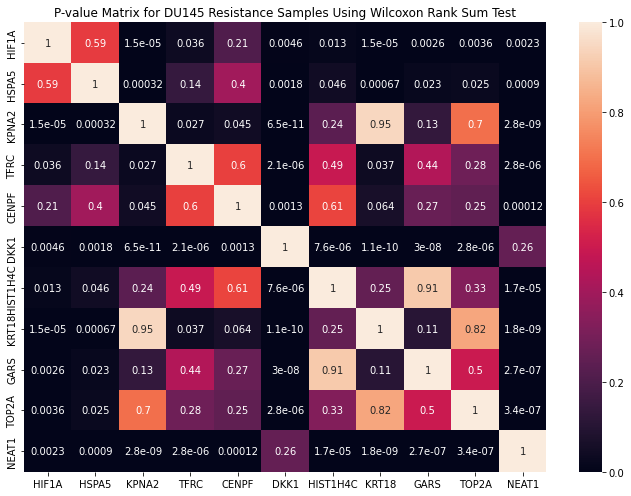

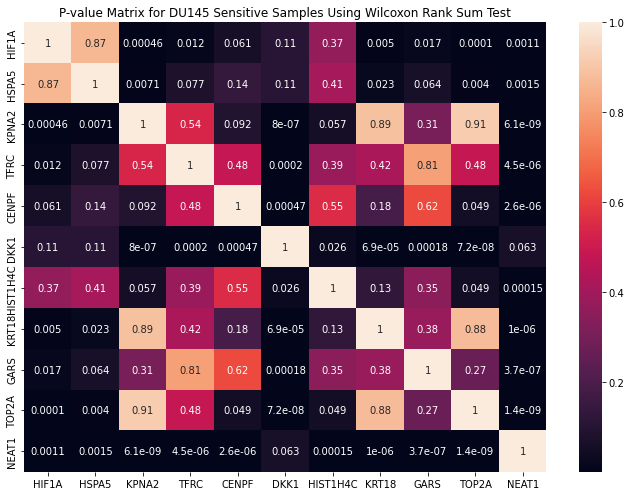

In [111]:
plot_matrix(pw_res, 'P-value Matrix for DU145 Resistance Samples Using Wilcoxon Rank Sum Test')
plot_matrix(pw_sen, 'P-value Matrix for DU145 Sensitive Samples Using Wilcoxon Rank Sum Test')

In [21]:
print("Significantly differentially expressed Resistance Genes for DU145")
diff_res

Significantly differentially expressed Resistance Genes for DU145


{'CENPF': ['KPNA2', 'DKK1', 'NEAT1'],
 'DKK1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A'],
 'GARS': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'HIF1A': ['KPNA2',
  'TFRC',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A',
  'NEAT1'],
 'HIST1H4C': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'HSPA5': ['KPNA2', 'DKK1', 'HIST1H4C', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'KPNA2': ['HIF1A', 'HSPA5', 'TFRC', 'CENPF', 'DKK1', 'NEAT1'],
 'KRT18': ['HIF1A', 'HSPA5', 'TFRC', 'DKK1', 'NEAT1'],
 'NEAT1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A'],
 'TFRC': ['HIF1A', 'KPNA2', 'DKK1', 'KRT18', 'NEAT1'],
 'TOP2A': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1']}

In [22]:
print("Significantly differentially expressed Sensitive Genes for DU145")
diff_sen

Significantly differentially expressed Sensitive Genes for DU145


{'CENPF': ['DKK1', 'TOP2A', 'NEAT1'],
 'DKK1': ['KPNA2', 'TFRC', 'CENPF', 'HIST1H4C', 'KRT18', 'GARS', 'TOP2A'],
 'GARS': ['HIF1A', 'DKK1', 'NEAT1'],
 'HIF1A': ['KPNA2', 'TFRC', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'HIST1H4C': ['DKK1', 'TOP2A', 'NEAT1'],
 'HSPA5': ['KPNA2', 'KRT18', 'TOP2A', 'NEAT1'],
 'KPNA2': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'KRT18': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'NEAT1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A'],
 'TFRC': ['HIF1A', 'DKK1', 'NEAT1'],
 'TOP2A': ['HIF1A', 'HSPA5', 'CENPF', 'DKK1', 'HIST1H4C', 'NEAT1']}

# PC3 Cell Line Analysis

In [23]:
PC3_average = PC3.drop(['sample', 'cell_line', 'og_df_idx'], axis = 1)
# select for resistance and sensitive genes and separate them into different dataframe
PC3_res = select_rows(PC3_average, selected_genes, 'Res')
PC3_sen = select_rows(PC3_average, selected_genes, 'Sen')

## Spearman Analysis

In [24]:
corrp_res, pp_res, sig_corrp_res = calculate_spearman(PC3_res)
corrp_sen, pp_sen, sig_corrp_sen = calculate_spearman(PC3_sen)

In [25]:
print("Significantly Correlated Resistance Genes for PC3")
sig_corrp_res

Significantly Correlated Resistance Genes for PC3


{'CENPF': ['KPNA2', 'HIST1H4C', 'TOP2A'],
 'DKK1': [],
 'GARS': [],
 'HIF1A': [],
 'HIST1H4C': ['CENPF'],
 'HSPA5': [],
 'KPNA2': ['CENPF', 'TOP2A'],
 'KRT18': [],
 'NEAT1': [],
 'TFRC': [],
 'TOP2A': ['KPNA2', 'CENPF']}

In [26]:
print("Significantly Correlated Sensitive Genes for PC3")
sig_corrp_sen

Significantly Correlated Sensitive Genes for PC3


{'CENPF': ['TOP2A'],
 'DKK1': ['HIF1A', 'KPNA2'],
 'GARS': [],
 'HIF1A': ['KPNA2', 'DKK1'],
 'HIST1H4C': [],
 'HSPA5': [],
 'KPNA2': ['HIF1A', 'DKK1', 'TOP2A'],
 'KRT18': [],
 'NEAT1': [],
 'TFRC': [],
 'TOP2A': ['KPNA2', 'CENPF']}

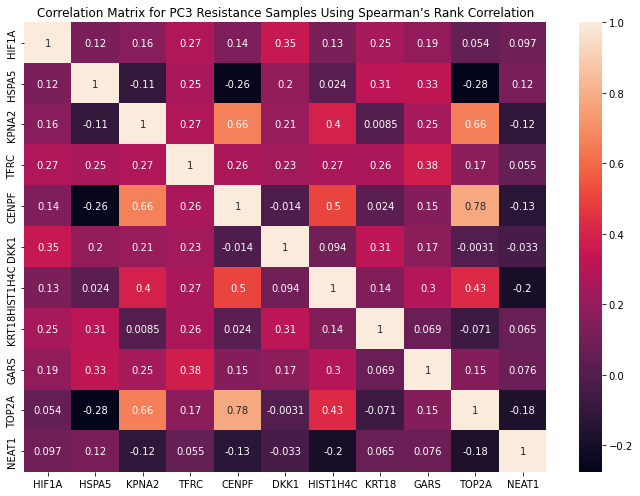

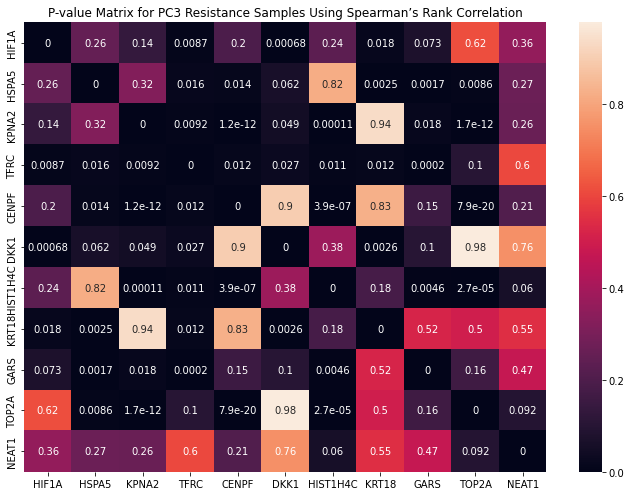

In [95]:
plot_matrix(corrp_res, 'Correlation Matrix for PC3 Resistance Samples Using Spearman’s Rank Correlation')
plot_matrix(pp_res, 'P-value Matrix for PC3 Resistance Samples Using Spearman’s Rank Correlation')

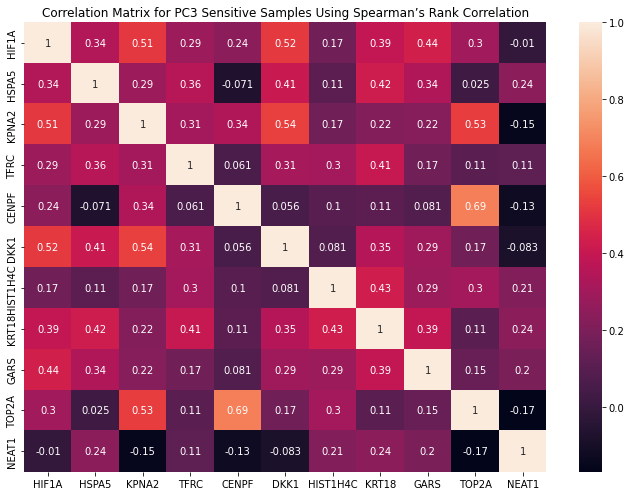

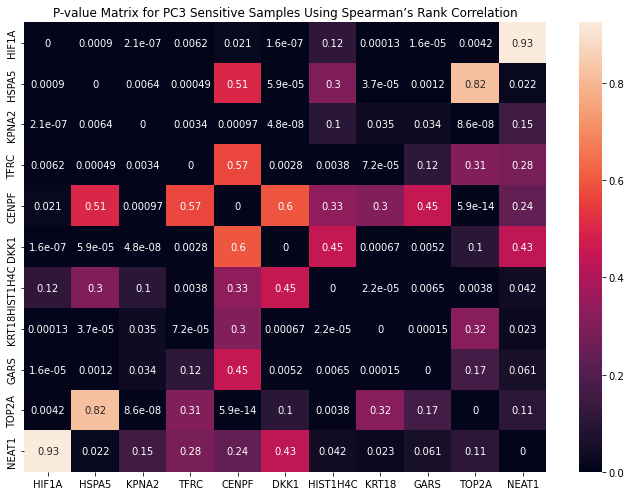

In [94]:
plot_matrix(corrp_sen, 'Correlation Matrix for PC3 Sensitive Samples Using Spearman’s Rank Correlation')
plot_matrix(pp_sen, 'P-value Matrix for PC3 Sensitive Samples Using Spearman’s Rank Correlation')

## Wilcoxon Rank Sum Test

In [100]:
ppw_res, diffp_res = calculate_wilcoxon(PC3_res)
ppw_sen, diffp_sen = calculate_wilcoxon(PC3_sen)

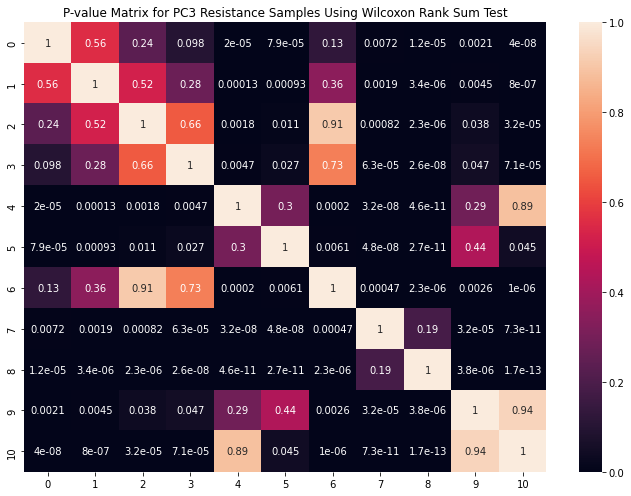

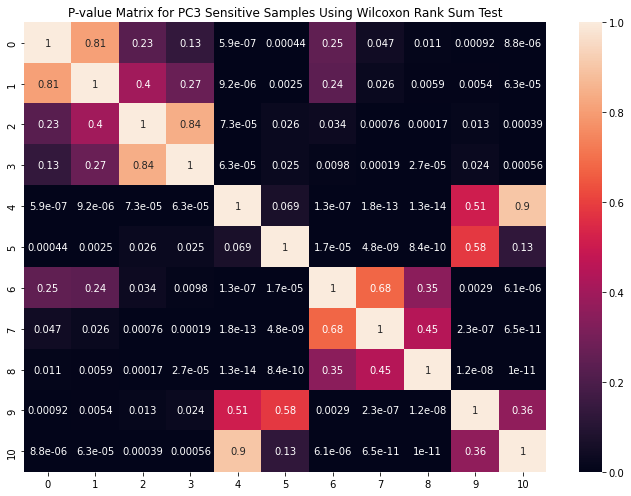

In [30]:
plot_matrix(ppw_res, 'P-value Matrix for PC3 Resistance Samples Using Wilcoxon Rank Sum Test')
plot_matrix(ppw_sen, 'P-value Matrix for PC3 Sensitive Samples Using Wilcoxon Rank Sum Test')

In [31]:
print("Significantly differentially expressed Resistance Genes for PC3")
diffp_res

Significantly differentially expressed Resistance Genes for PC3


{'CENPF': ['HIF1A', 'HSPA5', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS'],
 'DKK1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'NEAT1'],
 'GARS': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'TOP2A',
  'NEAT1'],
 'HIF1A': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'HIST1H4C': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'HSPA5': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'KPNA2': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'KRT18': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'TOP2A',
  'NEAT1'],
 'NEAT1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'GARS'],
 'TFRC': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'TOP2A': ['HIF1A', 'HSPA5', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS']}

In [32]:
print("Significantly differentially expressed Sensitive Genes for PC3")
diffp_sen

Significantly differentially expressed Sensitive Genes for PC3


{'CENPF': ['HIF1A', 'HSPA5', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS'],
 'DKK1': ['HIF1A', 'HSPA5', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS'],
 'GARS': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'TOP2A',
  'NEAT1'],
 'HIF1A': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'HIST1H4C': ['KPNA2', 'TFRC', 'CENPF', 'DKK1', 'TOP2A', 'NEAT1'],
 'HSPA5': ['CENPF', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'KPNA2': ['CENPF', 'DKK1', 'HIST1H4C', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'KRT18': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'TOP2A',
  'NEAT1'],
 'NEAT1': ['HIF1A', 'HSPA5', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS'],
 'TFRC': ['CENPF', 'DKK1', 'HIST1H4C', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'TOP2A': ['HIF1A', 'HSPA5', 'KPNA2', 'TFRC', 'HIST1H4C', 'KRT18', 'GARS']}

# Difference between Res and Sen Sample Analysis

## DU145 Analysis

In [33]:
DU145_processed = pd.DataFrame(columns=list((DU145_average.columns[2:])))
DU145_processed.index.name='ID'
for name, group in DU145_average.groupby('ID'):
  sorted_group = group.sort_values(by=['response']).drop(['response', 'ID'], axis = 1)
  DU145_processed.loc[name] = sorted_group.diff(axis=0).iloc[1].tolist()

In [34]:
DU145_selected_genes = DU145_processed[[c for c in DU145_processed.columns if c in selected_genes]]
DU145_selected_genes.head()

,HIF1A,HSPA5,KPNA2,TFRC,CENPF,DKK1,HIST1H4C,KRT18,GARS,TOP2A,NEAT1
ID,,,,,,,,,,,
1,1.670180,-0.051878,0.670370,0.142861,0.408878,0.084368,-1.450689,0.694884,0.294373,0.017817,0.944728
2,-0.541306,-4.915624,-2.889364,-3.551225,-0.027627,-3.071770,-2.112915,-1.176323,-0.400017,-0.832850,-1.012711
3,0.507210,-0.000842,-0.615224,-0.114698,-0.753585,3.365315,0.537281,1.016622,0.521417,-0.500506,-1.672328
4,0.159467,0.525343,0.297582,0.142355,-0.425973,0.696149,-0.993915,2.000510,0.130555,-0.002881,0.319912
5,0.769262,1.183956,0.510705,0.399312,-0.418457,-0.382961,-1.822503,1.563428,1.139958,-0.355075,0.549255


In [35]:
correlation_matrix = DU145_selected_genes.corr(method="spearman")
_, p_value = stats.spearmanr(DU145_selected_genes, axis=0)
p_value = pd.DataFrame(p_value)
p_value.columns = list(correlation_matrix.columns)
p_value.index = list(correlation_matrix.index)

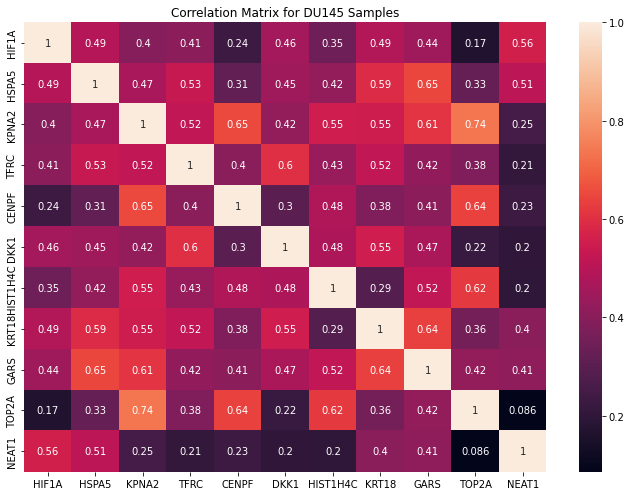

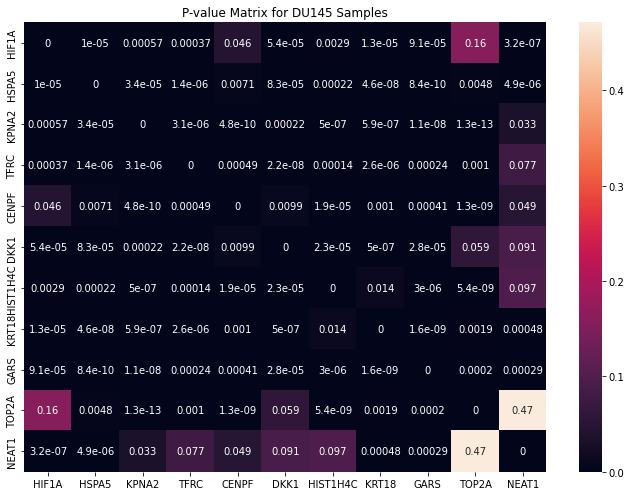

In [36]:
plot_matrix(correlation_matrix, 'Correlation Matrix for DU145 Samples')
plot_matrix(p_value, 'P-value Matrix for DU145 Samples')

In [37]:
significantly_correlated = {}
for column in DU145_selected_genes.columns:

  significantly_correlated[column] = [list(correlation_matrix[column].index)[list(correlation_matrix[column]).index(c)] for c, p in zip(list(correlation_matrix[column]), list(p_value[column])) if (c > 0.5 and c != 1.0 and p < 0.05)]

significantly_correlated


{'CENPF': ['KPNA2', 'TOP2A'],
 'DKK1': ['TFRC', 'KRT18'],
 'GARS': ['HSPA5', 'KPNA2', 'HIST1H4C', 'KRT18'],
 'HIF1A': ['NEAT1'],
 'HIST1H4C': ['KPNA2', 'GARS', 'TOP2A'],
 'HSPA5': ['TFRC', 'KRT18', 'GARS', 'NEAT1'],
 'KPNA2': ['TFRC', 'CENPF', 'HIST1H4C', 'KRT18', 'GARS', 'TOP2A'],
 'KRT18': ['HSPA5', 'KPNA2', 'TFRC', 'DKK1', 'GARS'],
 'NEAT1': ['HIF1A', 'HSPA5'],
 'TFRC': ['HSPA5', 'KPNA2', 'DKK1', 'KRT18'],
 'TOP2A': ['KPNA2', 'CENPF', 'HIST1H4C']}

In [38]:
significantly_different = {}
p_value_matrix = []
for column in DU145_selected_genes.columns:
  index = list(DU145_selected_genes.columns).index(column)
  p_value_temp = []
  for other in list(DU145_selected_genes.columns):
    w, p = stats.ranksums(DU145_selected_genes[column], DU145_selected_genes[other])
    p_value_temp.append(p)
    if p < 0.05:
      if column in significantly_different.keys():
        significantly_different[column].append(other)
      else:
        significantly_different[column] = [other]
  p_value_matrix.append(p_value_temp)
significantly_different

{'CENPF': ['HIF1A', 'KPNA2', 'DKK1', 'TOP2A', 'NEAT1'],
 'DKK1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A',
  'NEAT1'],
 'GARS': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'HIF1A': ['KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A',
  'NEAT1'],
 'HIST1H4C': ['HIF1A', 'KPNA2', 'DKK1', 'TOP2A', 'NEAT1'],
 'HSPA5': ['KPNA2', 'TFRC', 'DKK1', 'KRT18', 'GARS', 'TOP2A', 'NEAT1'],
 'KPNA2': ['HIF1A', 'HSPA5', 'CENPF', 'DKK1', 'HIST1H4C', 'NEAT1'],
 'KRT18': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'NEAT1': ['HIF1A',
  'HSPA5',
  'KPNA2',
  'TFRC',
  'CENPF',
  'DKK1',
  'HIST1H4C',
  'KRT18',
  'GARS',
  'TOP2A'],
 'TFRC': ['HIF1A', 'HSPA5', 'DKK1', 'NEAT1'],
 'TOP2A': ['HIF1A', 'HSPA5', 'CENPF', 'DKK1', 'HIST1H4C', 'NEAT1']}

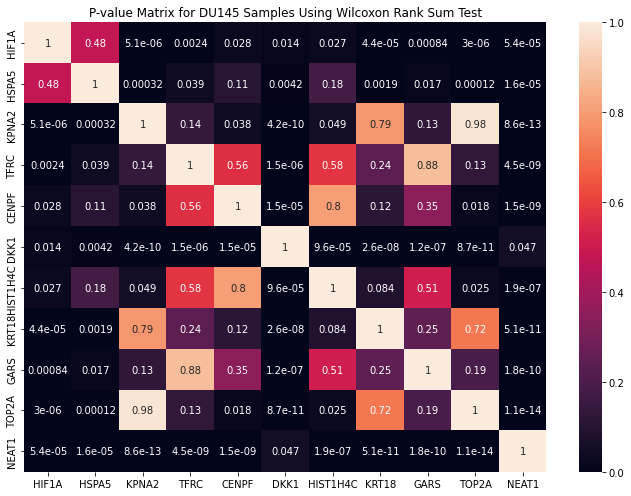

In [39]:
wilcox_df = pd.DataFrame(p_value_matrix, columns=DU145_selected_genes.columns, index = DU145_selected_genes.columns)
plot_matrix(wilcox_df, 'P-value Matrix for DU145 Samples Using Wilcoxon Rank Sum Test')

## PC3 Analysis

In [40]:
PC3_processed = pd.DataFrame(columns=list((PC3_average.columns[2:])))
PC3_processed.index.name='ID'
for name, group in PC3_average.groupby('ID'):
  sorted_group = group.sort_values(by=['response']).drop(['response', 'ID'], axis = 1)
  PC3_processed.loc[name] = sorted_group.diff(axis=0).iloc[1].tolist()
PC3_selected_genes = PC3_processed[[c for c in PC3_processed.columns if c in selected_genes]]
PC3_selected_genes.head()

,HIF1A,HSPA5,KPNA2,TFRC,CENPF,DKK1,HIST1H4C,KRT18,GARS,TOP2A,NEAT1
ID,,,,,,,,,,,
1,-0.961671,-1.834491,-0.299622,0.226037,3.132548,-1.062681,-0.292614,-0.624111,-1.123010,0.914840,0.167726
2,0.512274,0.872414,-1.053153,-0.506594,-0.060797,1.388562,0.124533,0.812704,-1.009918,-0.380899,1.559302
3,-0.063803,0.252427,0.317902,-0.224873,0.782658,1.035970,-3.293537,-0.675383,-2.980415,0.510376,0.085098
4,5.778740,3.948696,3.920828,5.910642,3.383501,3.798137,2.384423,4.212455,0.134746,1.946921,3.503553
5,0.692269,-0.022174,0.646261,0.690145,3.156162,-0.136577,-0.171070,-0.407044,-0.778187,2.638891,1.258520


In [41]:
PC_correlation_matrix = PC3_selected_genes.corr(method="spearman")
_, p_value_PC = stats.spearmanr(PC3_selected_genes, axis=0)
p_value_PC = pd.DataFrame(p_value_PC)
p_value_PC.columns = list(PC_correlation_matrix.columns)
p_value_PC.index = list(PC_correlation_matrix.index)

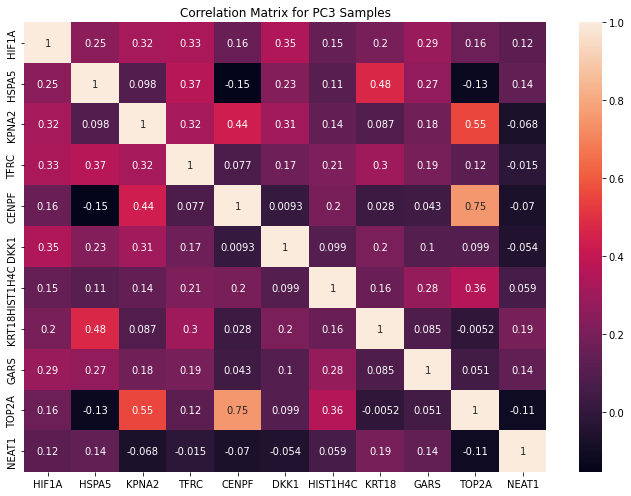

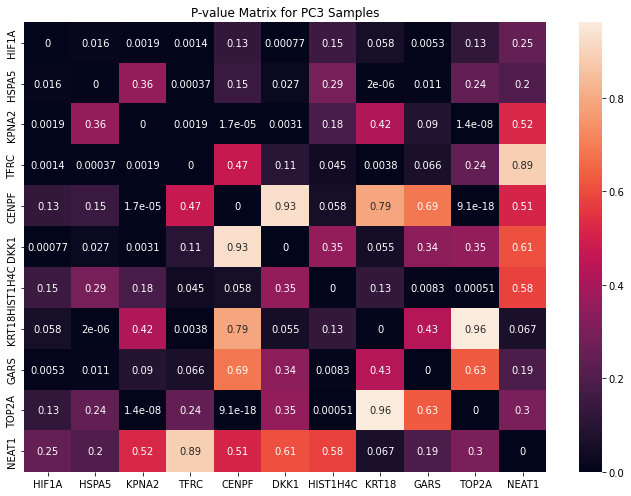

In [42]:
plot_matrix(PC_correlation_matrix, 'Correlation Matrix for PC3 Samples')
plot_matrix(p_value_PC, 'P-value Matrix for PC3 Samples')

In [43]:
significantly_correlated_PC = {}
for column in PC3_selected_genes.columns:

  significantly_correlated_PC[column] = [list(PC_correlation_matrix[column].index)[list(PC_correlation_matrix[column]).index(c)] for c, p in zip(list(PC_correlation_matrix[column]), list(p_value_PC[column])) if (c > 0.5 and c != 1.0 and p < 0.05)]
significantly_correlated_PC

{'CENPF': ['TOP2A'],
 'DKK1': [],
 'GARS': [],
 'HIF1A': [],
 'HIST1H4C': [],
 'HSPA5': [],
 'KPNA2': ['TOP2A'],
 'KRT18': [],
 'NEAT1': [],
 'TFRC': [],
 'TOP2A': ['KPNA2', 'CENPF']}

In [103]:
significantly_different_pc = {}
p_value_matrix_pc = []
for column in PC3_selected_genes.columns:
  index = list(PC3_selected_genes.columns).index(column)
  p_value_temp = []
  for other in list(PC3_selected_genes.columns):
    w, p = stats.ranksums(PC3_selected_genes[column], PC3_selected_genes[other])
    p_value_temp.append(p)
    if p < 0.05:
      if column in significantly_different_pc.keys():
        significantly_different_pc[column].append(other)
      else:
        significantly_different_pc[column] = [other]
  p_value_matrix_pc.append(p_value_temp)
significantly_different_pc


p_value_matrix_pc = pd.DataFrame(p_value_matrix_pc)
p_value_matrix_pc.columns = list(PC_correlation_matrix.columns)
p_value_matrix_pc.index = list(PC_correlation_matrix.index)

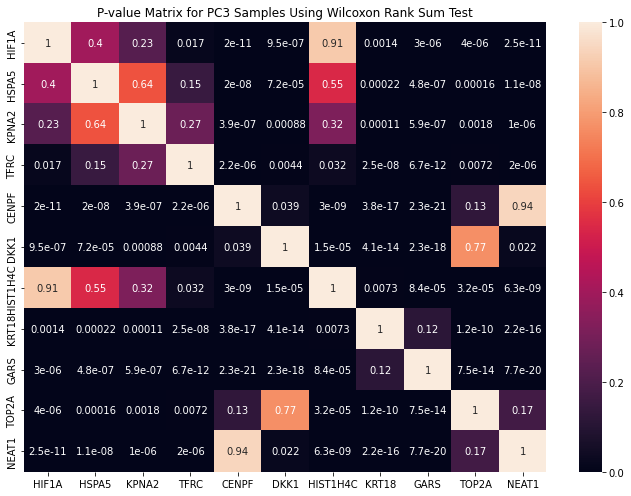

In [104]:
plot_matrix(p_value_matrix_pc, 'P-value Matrix for PC3 Samples Using Wilcoxon Rank Sum Test')